# Data Pipelining 

In [1]:
import tensorflow as tf
import pathlib
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
t1 = tf.constant([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype=tf.float32)


In [3]:
ds1 = tf.data.Dataset.from_tensors(t1)
ds2 = tf.data.Dataset.from_tensor_slices(t1)

for element in ds1:
    print(element)
    
for element in ds2:
    print(element)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)
tf.Tensor([7. 8. 9.], shape=(3,), dtype=float32)


In [4]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
images, labels = train
images = images/ 255

type(images), type(labels)

(numpy.ndarray, numpy.ndarray)

In [7]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [12]:
directory = "https://storage.googleapis.com/download.tensorflow.org/data/illiad/"
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']
file_paths = [
    tf.keras.utils.get_file(file_name, directory+file_name)
    for file_name in file_names
]

In [13]:
text_line_dataset = tf.data.TextLineDataset(file_paths)
for line in text_line_dataset.take(5):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


In [25]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

dataset_dir = tf.keras.utils.get_file(
    origin = data_url,
    untar = True, 
    cache_dir = "stack_overflow",
    cache_subdir=""
)

In [26]:
dataset_dir = pathlib.Path(dataset_dir).parent
print(dataset_dir)

\tmp\.keras


In [27]:
batch_size = 32
seed = 42

train_dir = dataset_dir/'train'
train_dir

WindowsPath('/tmp/.keras/train')

In [28]:
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir, batch_size=batch_size,
    validation_split=0.2,
    subset = 'training',
    seed = seed
)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [30]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
df = pd.read_csv(titanic_file)
titanic_dataset = tf.data.Dataset.from_tensor_slices(dict(df))

In [36]:
for feature_batch in titanic_dataset.take(1):
    for key, value in feature_batch.items():
        print("{:20s}:{}".format(key, value))

survived            :0
sex                 :b'male'
age                 :22.0
n_siblings_spouses  :1
parch               :0
fare                :7.25
class               :b'Third'
deck                :b'unknown'
embark_town         :b'Southampton'
alone               :b'n'


In [44]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, 
    batch_size=4, 
    label_name="survived",
    select_columns=["class", "fare", "survived"]
)

for feature_batch, label_batch in titanic_batches.take(1):
    print(f"survived: {label_batch}")
    for key, value in feature_batch.items():
        print(f"{key:20s}:{value}")

survived: [0 0 0 1]
fare                :[ 7.05    7.8958 10.5    82.1708]
class               :[b'Third' b'Third' b'Second' b'First']


In [45]:
titanic_types = [
    tf.int32, tf.string, tf.float32,tf.int32, tf.int32, 
    tf.float32, tf.string, tf.string, tf.string, tf.string
]

In [47]:
dataset = tf.data.experimental.CsvDataset(
    titanic_file, 
    titanic_types, 
    header=True
)

for line in dataset.take(10):
    print([item.numpy() for item in line])
    

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']
[1, b'female', 26.0, 0, 0, 7.925, b'Third', b'unknown', b'Southampton', b'y']
[1, b'female', 35.0, 1, 0, 53.1, b'First', b'C', b'Southampton', b'n']
[0, b'male', 28.0, 0, 0, 8.4583, b'Third', b'unknown', b'Queenstown', b'y']
[0, b'male', 2.0, 3, 1, 21.075, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 27.0, 0, 2, 11.1333, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 14.0, 1, 0, 30.0708, b'Second', b'unknown', b'Cherbourg', b'n']
[1, b'female', 4.0, 1, 1, 16.7, b'Third', b'G', b'Southampton', b'n']
[0, b'male', 20.0, 0, 0, 8.05, b'Third', b'unknown', b'Southampton', b'y']


In [48]:
flower_root = tf.keras.utils.get_file('flower_photos', 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',untar=True)
flower_root = pathlib.Path(flower_root)

In [51]:
for item in flower_root.glob('*'):
    print(item)

C:\Users\GF LAB\.keras\datasets\flower_photos\daisy
C:\Users\GF LAB\.keras\datasets\flower_photos\dandelion
C:\Users\GF LAB\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\GF LAB\.keras\datasets\flower_photos\roses
C:\Users\GF LAB\.keras\datasets\flower_photos\sunflowers
C:\Users\GF LAB\.keras\datasets\flower_photos\tulips


In [54]:
file_path_ds = tf.data.Dataset.list_files(str(flower_root/'*/*'))

def process_path(file_path):
    label = tf.strings.split(file_path, os.sep)[-2]
    return tf.io.read_file(file_path), label

labeled_ds = file_path_ds.map(process_path) 

for image_raw, label in labeled_ds.take(1):
    print(image_raw, label, sep="\n")

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0crTRC\x00\x

In [55]:

inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)

dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)

for batch in batched_dataset.take(4):
    print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3], dtype=int64), array([ 0, -1, -2, -3], dtype=int64)]
[array([4, 5, 6, 7], dtype=int64), array([-4, -5, -6, -7], dtype=int64)]
[array([ 8,  9, 10, 11], dtype=int64), array([ -8,  -9, -10, -11], dtype=int64)]
[array([12, 13, 14, 15], dtype=int64), array([-12, -13, -14, -15], dtype=int64)]


In [58]:
dataset.batch(4, drop_remainder=True)

dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
padded_batch_dataset = dataset.padded_batch(4, padded_shapes=(None, ))
for batch in padded_batch_dataset.take(2):
    print(batch.numpy(), end="\n\n")

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



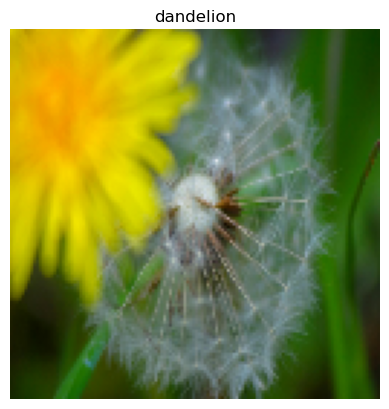

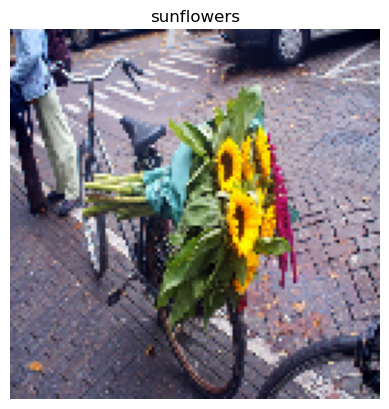

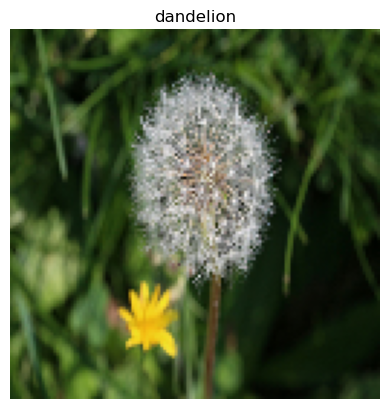

In [60]:
dataset = tf.data.TextLineDataset(titanic_file)
dataset.shuffle(buffer_size=10)

file_path_ds = tf.data.Dataset.list_files(str(flower_root/'*/*'))

def parse_image(filename):
    label = tf.strings.split(filename, os.sep)[-2]
    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)

    
    image = tf.image.resize(image, [128, 128])
    
    return image, label

image_ds = file_path_ds.map(parse_image)

def show(image, label):
    plt.imshow(image)
    plt.title(label.numpy().decode('utf-8'))
    
    plt.axis("off")
    plt.show()
    
for image, label in image_ds.take(3):
    show(image, label)

In [64]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images  = images / 255.0


fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(fmnist_train_ds, epochs=2)

loss, accuracy = model.evaluate(fmnist_train_ds)

Epoch 1/2
1875/1875 [==============================] - 3s 884us/step - loss: 0.5989 - accuracy: 0.7990
Epoch 2/2
1875/1875 [==============================] - 2s 785us/step - loss: 0.4409 - accuracy: 0.8469


In [68]:
print("Loss:", loss, "Accuracy:", accuracy)
predict = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict, steps=10)
print(result.shape)

Loss: 0.4408952593803406 Accuracy: 0.8469499945640564
10/10 [==============================] - 0s 1ms/step
(320, 10)
